# Edge Detection in OpenCV

## 01. Import and Load Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2, sys


# Manually specify the path to the project directory
project_path = '../../'

# Add the project directory to sys.path
sys.path.append(project_path)

from mansoor import Repeatable

### Create and Instance Of Repeater

In [2]:
r = Repeatable(300,300, base_path='../../data/images/') # It have functions that we need to do Repeatedly

## 02. `cv2.Canny()` Function Parameters

<div style="font-family: 'Arial', sans-serif; font-size: 20px; text-align: left; color: #ffffff; background-color: #2d2d2d; padding: 25px; border: 5px solid #ffcc00; border-radius: 15px; box-shadow: 0 6px 20px rgba(0, 0, 0, 0.6); margin-bottom: 25px;">
    <p style="color: #cccccc;">
        <strong style="color: #ffcc00;">Parameters</strong>
    </p>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li><strong>image</strong> (<code>numpy.ndarray</code>): The input image on which edge detection is performed. It must be in grayscale (single-channel), as the Canny algorithm operates on intensity gradients in the image. If the image is in color, it must first be converted to grayscale using <code>cv2.cvtColor()</code>.</li>
        <li><strong>threshold1</strong> (<code>int</code>): The lower threshold for the hysteresis procedure. Pixels with intensity gradients lower than this value are discarded. This parameter helps filter out noise and non-relevant edges. It should be smaller than <strong>threshold2</strong>.</li>
        <li><strong>threshold2</strong> (<code>int</code>): The upper threshold for the hysteresis procedure. Pixels with intensity gradients greater than this value are considered edges. Pixels with gradients between <strong>threshold1</strong> and <strong>threshold2</strong> are kept only if they are connected to strong edges (i.e., gradients higher than <strong>threshold2</strong>).</li>
        <li><strong>apertureSize</strong> (<code>int</code>, default=3): The size of the Sobel kernel used to calculate the gradient of the image. It defines the window used for gradient estimation. The size must be an odd integer (e.g., 3, 5, 7). Larger values result in more smoothing and can help reduce noise, but may blur edges.</li>
        <li><strong>L2gradient</strong> (<code>bool</code>, default=False): If <code>True</code>, the function uses the L2 norm (Euclidean distance) to calculate the gradient magnitude, which is more accurate. If <code>False</code> (default), it uses the L1 norm (sum of absolute gradients). The L2 norm tends to be more computationally expensive but produces more precise gradient measurements.</li>
    </ul>
    <strong style="color: #ffcc00;">Summary</strong>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li><strong>threshold1</strong> and <strong>threshold2</strong> define the gradient range for edge detection. A higher difference between these values reduces the number of edges detected.</li>
        <li><strong>apertureSize</strong> determines the size of the Sobel kernel for gradient computation. Larger values increase smoothing but may reduce edge sharpness.</li>
        <li><strong>L2gradient</strong> toggles the accuracy of gradient magnitude calculation, with the L2 norm providing more precise results at a computational cost.</li>
    </ul>
    <strong style="color: #ffcc00;">When Does Canny Give Better Results?</strong>
    <p style="color: #cccccc;">
        Canny edge detection tends to give better results in the following cases:
    </p>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li><strong>Clear and Sharp Edges</strong>: Canny performs well when there are clear, well-defined edges in the image, where the intensity gradient changes sharply.</li>
        <li><strong>Noise-Free or Pre-Processed Images</strong>: Canny works best when the image is relatively clean or pre-processed with noise reduction techniques (e.g., Gaussian blur). It is sensitive to noise, so if the image contains a lot of noise, it might detect spurious edges. Pre-processing with smoothing can improve the result.</li>
        <li><strong>High Contrast</strong>: In images with high contrast between foreground and background, the algorithm is more likely to detect strong edges and produce clear, continuous boundaries.</li>
        <li><strong>Well-Tuned Thresholds</strong>: Properly tuning <strong>threshold1</strong> and <strong>threshold2</strong> based on the image's gradient characteristics ensures optimal edge detection. Too high a threshold will miss faint edges, while too low a threshold may result in detecting noise.</li>
    </ul>
    <p style="color: #cccccc;">
        In summary, Canny edge detection gives the best results when the image has strong, distinct edges and minimal noise. It excels in well-contrasted images, especially when fine-tuned for the specific characteristics of the image.
    </p>
</div>



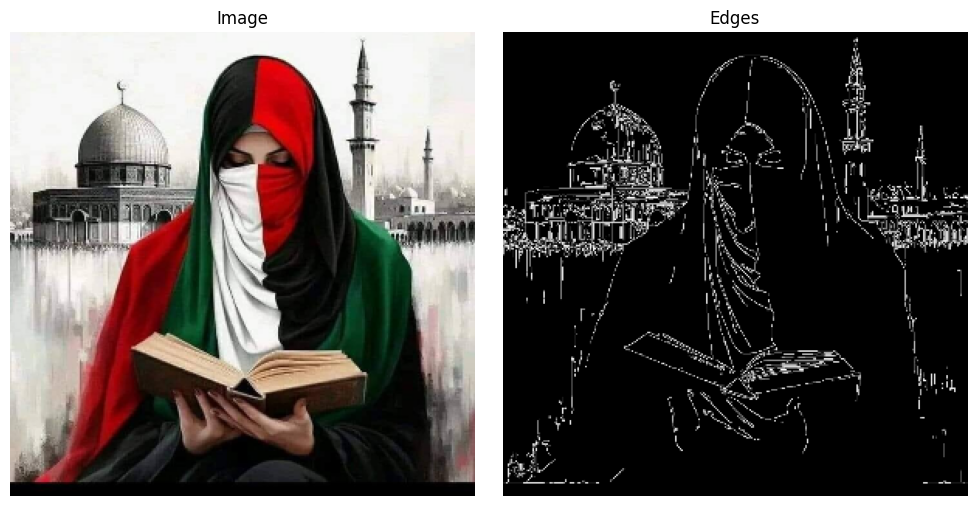

In [3]:
img = r.load_image('1.jpg')
new = cv2.Canny(img, 100, 200, apertureSize=3, L2gradient=True)

r.show_multiple_images(images=(img, new), titles=('Image', 'Edges'), cols=2)

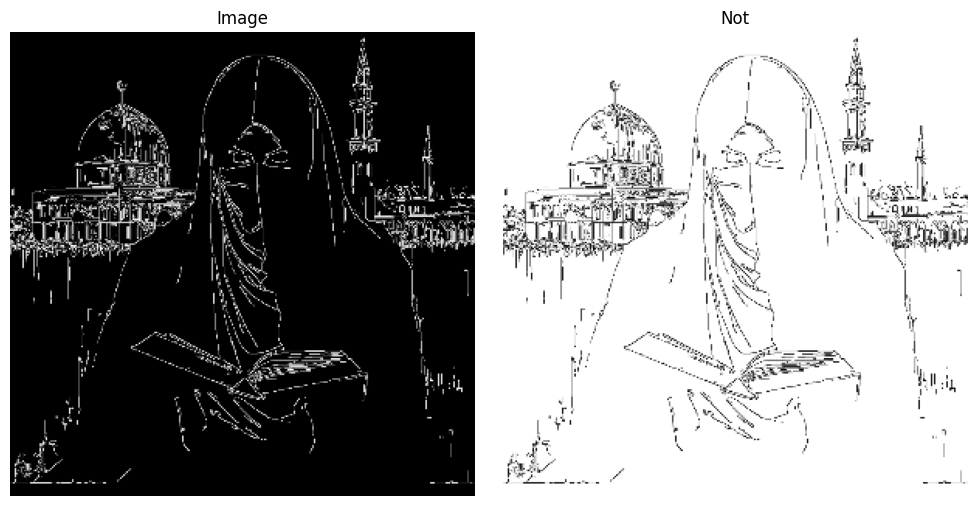

In [4]:
n = cv2.bitwise_not(new)
r.show_multiple_images(images=(new, n), titles=('Image', 'Not'), cols=2)

#### Test it on a image with clear Edges

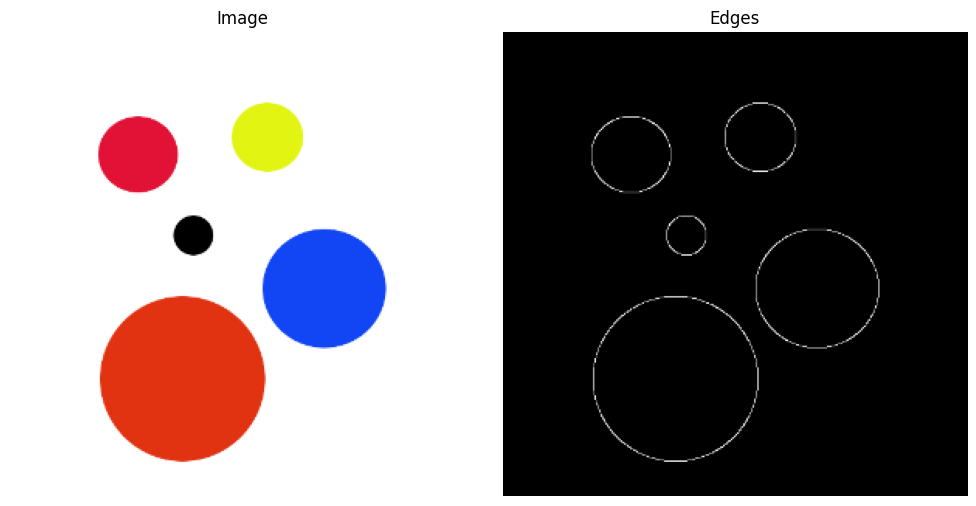

In [5]:
img = r.load_image('circles.jpg')
new = cv2.Canny(img, 200, 250)
r.show_multiple_images(images=(img, new), titles=('Image', 'Edges'), cols=2)

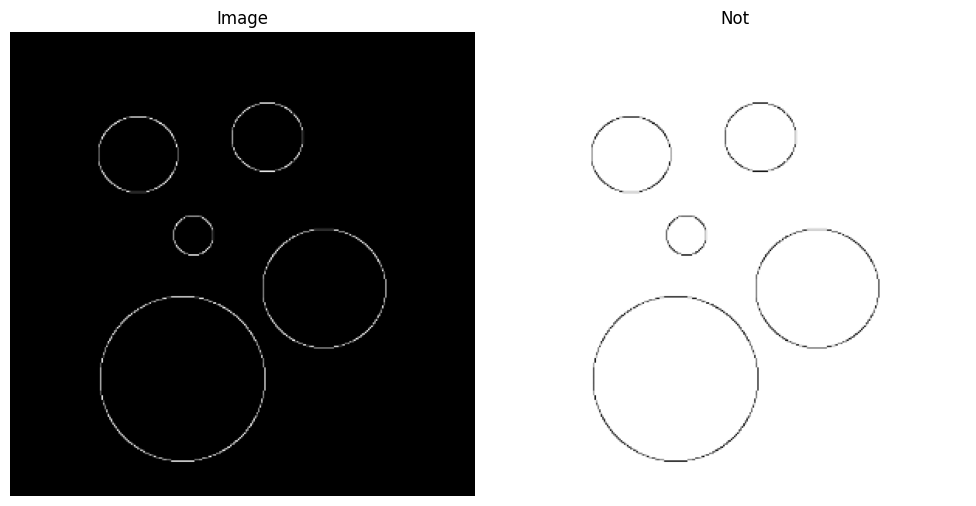

In [6]:
n = cv2.bitwise_not(new)
r.show_multiple_images(images=(new, n), titles=('Image', 'Not'), cols=2)

<div style="font-family: 'Arial', sans-serif; font-size: 20px; text-align: left; color: #ffffff; background-color: #2d2d2d; padding: 25px; border: 5px solid #ffcc00; border-radius: 15px; box-shadow: 0 6px 20px rgba(0, 0, 0, 0.6); margin-bottom: 25px;">
    <strong style="color: #ffcc00;">Summary of Parameters for <code>cv2.Canny()</code></strong>
    <table style="color: #cccccc; width: 100%; padding-left: 20px; margin-top: 10px; border-collapse: collapse;">
        <thead>
            <tr style="border-bottom: 2px solid #ffcc00;">
                <th style="padding: 10px; text-align: left; width: 25%;">Parameter</th>
                <th style="padding: 10px; text-align: left;">Description</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="padding: 10px;">image</td>
                <td style="padding: 10px;">The input image (grayscale, single-channel).</td>
            </tr>
            <tr>
                <td style="padding: 10px;">threshold1</td>
                <td style="padding: 10px;">The lower threshold for the hysteresis procedure. It is used to classify edges as strong or weak.</td>
            </tr>
            <tr>
                <td style="padding: 10px;">threshold2</td>
                <td style="padding: 10px;">The upper threshold for the hysteresis procedure. It is used to classify edges as strong, weak, or non-edges.</td>
            </tr>
            <tr>
                <td style="padding: 10px;">edges</td>
                <td style="padding: 10px;">The output image to store the result (optional). If not provided, a new image is created.</td>
            </tr>
            <tr>
                <td style="padding: 10px;">apertureSize</td>
                <td style="padding: 10px;">The size of the Sobel kernel used to compute gradients. Must be 3, 5, or 7. Default is 3.</td>
            </tr>
            <tr>
                <td style="padding: 10px;">L2gradient</td>
                <td style="padding: 10px;">A flag indicating whether to use the more accurate L2 norm for edge detection. If <code>True</code>, it uses <code>sqrt(dx^2 + dy^2)</code>. Default is <code>False</code> (uses L1 norm, <code>|dx| + |dy|</code>).</td>
            </tr>
        </tbody>
    </table>
</div>

## 03. `cv2.Sobel()` Function for Edge Detection

<div style="font-family: 'Arial', sans-serif; font-size: 20px; text-align: left; color: #ffffff; background-color: #2d2d2d; padding: 25px; border: 5px solid #ffcc00; border-radius: 15px; box-shadow: 0 6px 20px rgba(0, 0, 0, 0.6); margin-bottom: 25px;">
    <strong style="color: #ffcc00;">The <code>cv2.Sobel()</code> Function</strong>
    <p style="color: #cccccc;">
        The <code>cv2.Sobel()</code> function in OpenCV is used for edge detection by computing the <strong>first-order derivatives</strong> of the image. These derivatives represent the rate of change in intensity along specific directions (horizontal and vertical), allowing the detection of edges in the image.
    </p>
    <strong style="color: #ffcc00;">Syntax</strong>
    <pre style="background-color: #333333; padding: 10px; color: #cccccc;">
<code>cv2.Sobel(src, ddepth, dx, dy, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)</code>
    </pre>
    <strong style="color: #ffcc00;">Explanation of Parameters</strong>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li><strong>src</strong> (<code>numpy.ndarray</code>): The input image (grayscale, single-channel).</li>
        <li><strong>ddepth</strong> (<code>int</code>): The desired depth of the output image. Typically set to <code>-1</code>.</li>
        <li><strong>dx</strong> (<code>int</code>): The order of the derivative in the x-direction (horizontal).</li>
        <li><strong>dy</strong> (<code>int</code>): The order of the derivative in the y-direction (vertical).</li>
        <li><strong>ksize</strong> (<code>int</code>, default=3): The size of the Sobel kernel (must be an odd integer).</li>
        <li><strong>scale</strong> (<code>float</code>, default=1): Scaling factor for the derivative.</li>
        <li><strong>delta</strong> (<code>float</code>, default=0): Value added to the result of the derivative computation.</li>
        <li><strong>borderType</strong> (<code>int</code>, default=<code>cv2.BORDER_DEFAULT</code>): Defines how the border of the image is handled during derivative computation.</li>
    </ul>
    <strong style="color: #ffcc00;">Summary of Sobel Edge Detection</strong>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li><strong>dx</strong> and <strong>dy</strong>: Control the direction of the gradient calculation. Set <code>dx=1</code> and <code>dy=0</code> for horizontal edges, or <code>dx=0</code> and <code>dy=1</code> for vertical edges.</li>
        <li><strong>ksize</strong>: Determines the size of the Sobel kernel. Larger values result in smoother edges but may blur fine details.</li>
        <li><strong>scale</strong> and <strong>delta</strong>: Allow adjustment of the intensity and shifting of the computed gradient.</li>
        <li><strong>ddepth</strong>: Specifies the depth of the output image, where <code>-1</code> means the same depth as the input.</li>
    </ul>
    <strong style="color: #ffcc00;">Sobel Operator for Edge Detection</strong>
    <p style="color: #cccccc;">
        The Sobel operator computes the <strong>gradient</strong> of the image intensity in both the horizontal (<code>dx</code>) and vertical (<code>dy</code>) directions. The gradient magnitude at each pixel is calculated using the formula:
    </p>
    <pre style="background-color: #333333; padding: 10px; color: #cccccc;">
<code>G = sqrt((G_x)^2 + (G_y)^2)</code>
    </pre>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li><strong>Horizontal edges</strong>: Set <code>dx=1</code> and <code>dy=0</code>.</li>
        <li><strong>Vertical edges</strong>: Set <code>dx=0</code> and <code>dy=1</code>.</li>
    </ul>
    <strong style="color: #ffcc00;">When to Use Sobel Edge Detection</strong>
    <p style="color: #cccccc;">
        Sobel edge detection is commonly used when:
    </p>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li>You need to highlight edges in an image, particularly in horizontal or vertical directions.</li>
        <li>The image has moderate noise. Sobel is less sensitive to small variations in the image than more complex algorithms (like Canny).</li>
        <li>You want to calculate gradients for feature extraction, such as in image segmentation or object detection tasks.</li>
    </ul>
</div>

In [7]:
new = cv2.Sobel(img, ddepth=-1, dx=1, dy=1, ksize=3, scale=6, delta=0, borderType=cv2.BORDER_DEFAULT)

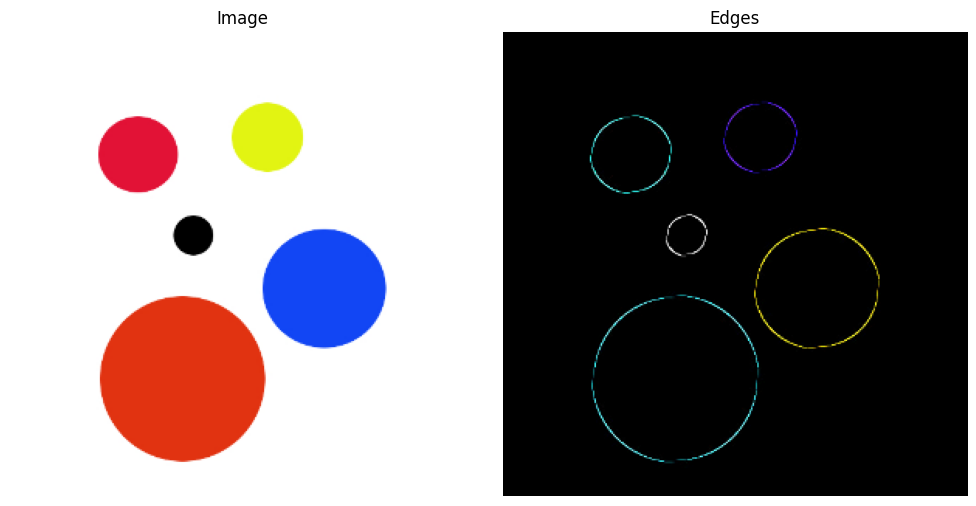

In [8]:
r.show_multiple_images(images=(img, new), titles=('Image', 'Edges'), cols=2)

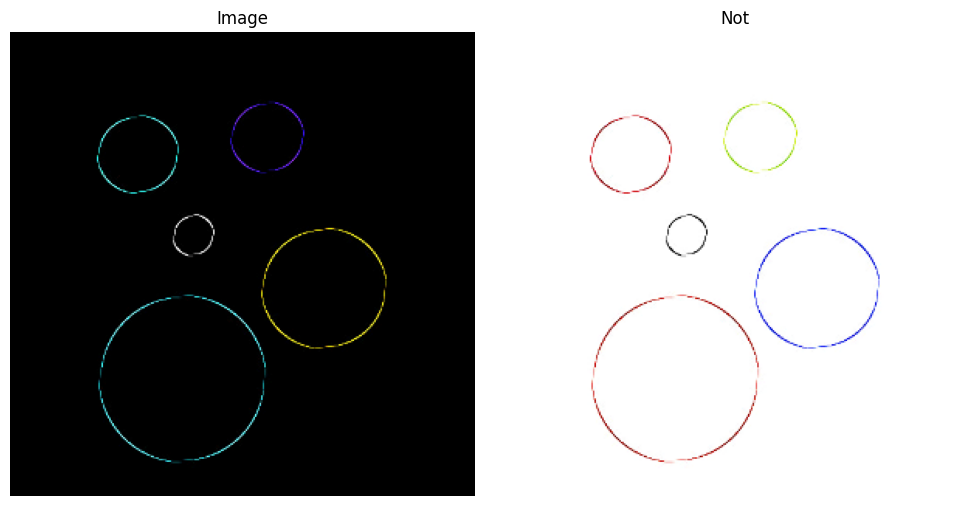

In [9]:
n = cv2.bitwise_not(new)
r.show_multiple_images(images=(new, n), titles=('Image', 'Not'), cols=2)

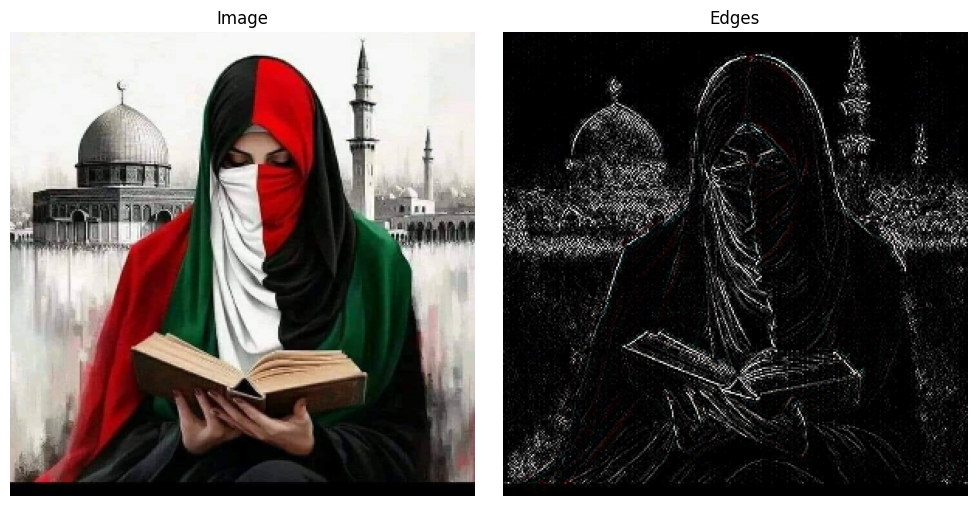

In [10]:
img = r.load_image('1.jpg')
new = cv2.Sobel(img, ddepth=-1, dx=1, dy=1, ksize=3, scale=6, delta=0, borderType=cv2.BORDER_DEFAULT)
r.show_multiple_images(images=(img, new), titles=('Image', 'Edges'), cols=2)

<div style="font-family: 'Arial', sans-serif; font-size: 20px; text-align: left; color: #ffffff; background-color: #2d2d2d; padding: 25px; border: 5px solid #ffcc00; border-radius: 15px; box-shadow: 0 6px 20px rgba(0, 0, 0, 0.6); margin-bottom: 25px;">
    <strong style="color: #ffcc00;">Summary of Parameters for <code>cv2.Sobel()</code></strong>
    <table style="width: 100%; border-collapse: collapse; margin-top: 20px;">
        <thead>
            <tr style="background-color: #444444; color: #ffffff;">
                <th style="padding: 10px; text-align: left;">Parameter</th>
                <th style="padding: 10px; text-align: left;">Description</th>
            </tr>
        </thead>
        <tbody style="color: #cccccc;">
            <tr>
                <td style="padding: 10px;">src</td>
                <td style="padding: 10px;">The input image (grayscale, single-channel).</td>
            </tr>
            <tr>
                <td style="padding: 10px;">ddepth</td>
                <td style="padding: 10px;">The depth of the output image. Set to <code>-1</code> for the same depth as the input image, or specify one of the following: <code>CV_8U</code>, <code>CV_16S</code>, <code>CV_32F</code>, <code>CV_64F</code>.</td>
            </tr>
            <tr>
                <td style="padding: 10px;">dx</td>
                <td style="padding: 10px;">The order of the derivative in the x-direction. Set to <code>1</code> for the first derivative (edges in x-direction).</td>
            </tr>
            <tr>
                <td style="padding: 10px;">dy</td>
                <td style="padding: 10px;">The order of the derivative in the y-direction. Set to <code>1</code> for the first derivative (edges in y-direction).</td>
            </tr>
            <tr>
                <td style="padding: 10px;">ksize</td>
                <td style="padding: 10px;">The size of the Sobel kernel. Typical values are <code>1</code>, <code>3</code>, <code>5</code>, or <code>7</code>. Larger values provide smoother edges but may lose details.</td>
            </tr>
            <tr>
                <td style="padding: 10px;">scale</td>
                <td style="padding: 10px;">A scaling factor applied to the result (default is <code>1</code>).</td>
            </tr>
            <tr>
                <td style="padding: 10px;">delta</td>
                <td style="padding: 10px;">A value added to the result (default is <code>0</code>).</td>
            </tr>
            <tr>
                <td style="padding: 10px;">borderType</td>
                <td style="padding: 10px;">Specifies how the borders of the image are handled (default is <code>cv2.BORDER_DEFAULT</code>). Common options include <code>cv2.BORDER_REPLICATE</code>, <code>cv2.BORDER_REFLECT</code>, etc.</td>
            </tr>
        </tbody>
    </table>
</div>


## 04. `cv2.HoughLines()` Function for Line Detection

<div style="font-family: 'Arial', sans-serif; font-size: 20px; text-align: left; color: #ffffff; background-color: #2d2d2d; padding: 25px; border: 5px solid #ffcc00; border-radius: 15px; box-shadow: 0 6px 20px rgba(0, 0, 0, 0.6); margin-bottom: 25px;">
    <strong style="color: #ffcc00;">The <code>cv2.HoughLines()</code> Function for Line Detection</strong>
    <p style="color: #cccccc;">The <code>cv2.HoughLines()</code> function in OpenCV is used to detect straight lines in an image using the <strong>Hough Transform</strong>. It detects lines by transforming points in the image space to parameter space and identifying points that form straight lines.</p>
    <strong style="color: #ffcc00;">Explanation of Parameters</strong>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li><strong>image</strong> (<em>numpy.ndarray</em>): The input image in which lines are to be detected. It should be a binary image (edges detected, e.g., using Canny).</li>
        <li><strong>rho</strong> (<em>float</em>): The resolution of the accumulator in pixels. It represents the distance resolution of the parameter space in pixels. Commonly, this value is set to 1.</li>
        <li><strong>theta</strong> (<em>float</em>): The angle resolution of the accumulator in radians. Typically, this is set to <code>np.pi / 180</code> (1 degree).</li>
        <li><strong>threshold</strong> (<em>int</em>): The minimum number of intersections in the Hough space to detect a line. This is the "voting" threshold, where points (lines) are considered detected if their value exceeds the threshold.</li>
    </ul>
    <strong style="color: #ffcc00;">Output</strong>
    <p style="color: #cccccc;">
        <strong>Returns</strong>: The function returns a list of detected lines, represented as <code>(rho, theta)</code> pairs. Each line is described by its distance from the origin (<code>rho</code>) and its angle (<code>theta</code>).
    </p>
    <strong style="color: #ffcc00;">Summary</strong>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li><strong>rho</strong>: Defines the resolution in the distance direction. Usually set to 1 pixel.</li>
        <li><strong>theta</strong>: Defines the resolution in the angle direction. Commonly set to <code>np.pi / 180</code> (1 degree).</li>
        <li><strong>threshold</strong>: Controls the sensitivity of the detection. Higher values make the detection more selective (fewer lines).</li>
    </ul>
    <strong style="color: #ffcc00;">When to Use <code>cv2.HoughLines()</code></strong>
    <p style="color: #cccccc;">
        <code>cv2.HoughLines()</code> is useful for detecting straight lines in images, particularly when:
    </p>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li>You have a clear edge image (such as after using Canny edge detection).</li>
        <li>You need to detect simple, straight structures like roads, borders, or object boundaries in images.</li>
    </ul>
</div>


								Detect Edges


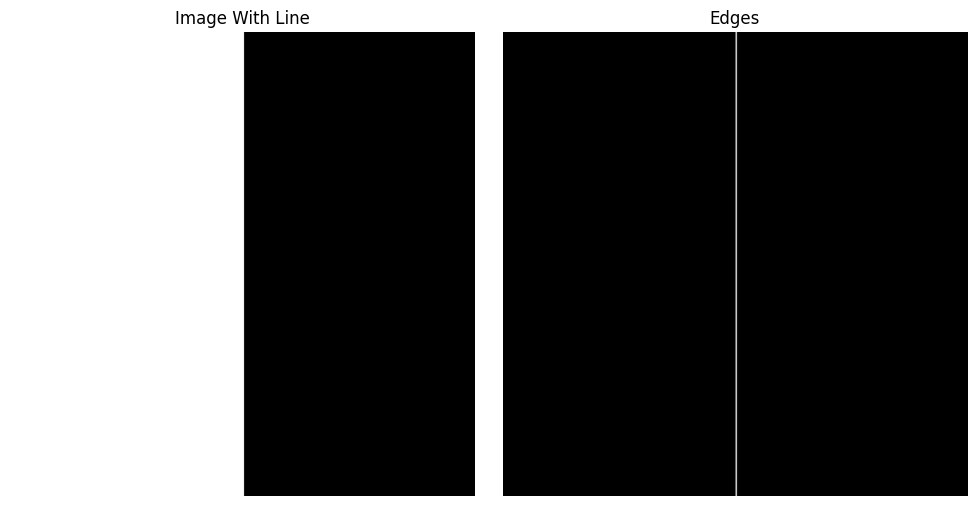

In [11]:
img = r.load_image('1bit1.png')
new = cv2.Canny(img, 100, 230) # Here we detect edges
print("\t\t\t\t\t\t\t\tDetect Edges")
r.show_multiple_images(images=(img, new), titles=('Image With Line', 'Edges'), cols=2)

In [12]:
# Define parameters for HoughLinesP
min_line_length = 10  # Minimum length of a line
max_line_gap = 5     # Maximum allowed gap between line segments
lines = cv2.HoughLinesP(new, 3, np.pi / 180, 30, minLineLength=min_line_length, maxLineGap=max_line_gap)

In [13]:
# Draw detected lines on the original image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (120, 255, 10), 4)  # Green lines

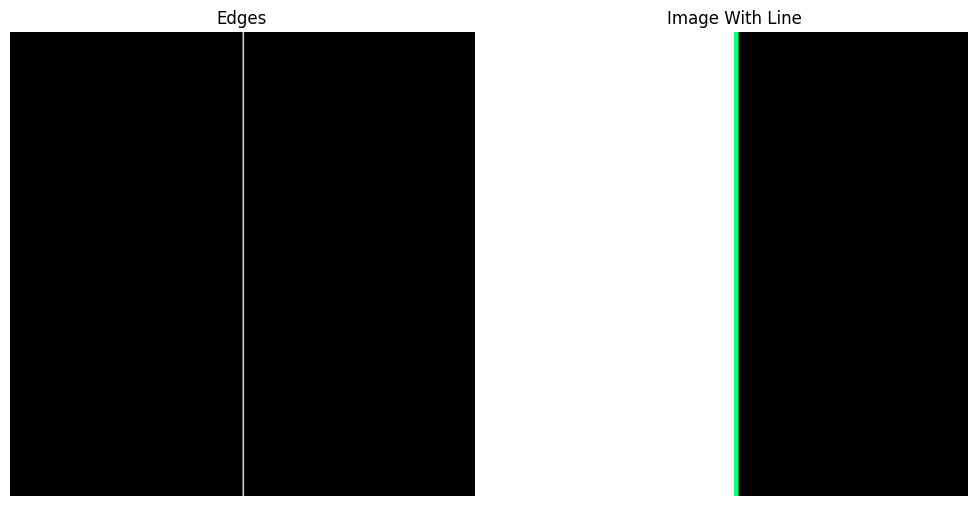

In [14]:
r.show_multiple_images(images=(new, img), titles=('Edges', 'Image With Line'), cols=2)

<div style="font-family: 'Arial', sans-serif; font-size: 20px; text-align: left; color: #ffffff; background-color: #2d2d2d; padding: 25px; border: 5px solid #ffcc00; border-radius: 15px; box-shadow: 0 6px 20px rgba(0, 0, 0, 0.6); margin-bottom: 25px;">
    <strong style="color: #ffcc00;">Comparison of <code>cv2.HoughLines()</code> and <code>cv2.HoughLinesP()</code></strong>
    <p style="color: #cccccc;">The functions <code>cv2.HoughLines()</code> and <code>cv2.HoughLinesP()</code> are both used for line detection in an image, but they differ in the type of lines they detect, the efficiency, and the parameters they use.</p>
    <strong style="color: #ffcc00;">Summary</strong>
    <table style="color: #cccccc; width: 100%; border-collapse: collapse; margin-top: 20px;">
        <thead>
            <tr>
                <th style="padding: 10px; text-align: left; border-bottom: 2px solid #ffcc00;">Feature</th>
                <th style="padding: 10px; text-align: left; border-bottom: 2px solid #ffcc00;">cv2.HoughLines()</th>
                <th style="padding: 10px; text-align: left; border-bottom: 2px solid #ffcc00;">cv2.HoughLinesP()</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="padding: 10px;">Line Type</td>
                <td style="padding: 10px;">Infinite lines</td>
                <td style="padding: 10px;">Line segments (finite lines)</td>
            </tr>
            <tr>
                <td style="padding: 10px;">Output</td>
                <td style="padding: 10px;">Polar coordinates (rho, theta)</td>
                <td style="padding: 10px;">Cartesian coordinates (x1, y1, x2, y2)</td>
            </tr>
            <tr>
                <td style="padding: 10px;">Efficiency</td>
                <td style="padding: 10px;">Less efficient</td>
                <td style="padding: 10px;">More efficient, especially for broken lines</td>
            </tr>
            <tr>
                <td style="padding: 10px;">Use Case</td>
                <td style="padding: 10px;">Continuous lines (e.g., roads, tracks)</td>
                <td style="padding: 10px;">Fragmented or broken lines (e.g., lanes)</td>
            </tr>
            <tr>
                <td style="padding: 10px;">Parameters</td>
                <td style="padding: 10px;">rho, theta, threshold</td>
                <td style="padding: 10px;">rho, theta, threshold, minLineLength, maxLineGap</td>
            </tr>
        </tbody>
    </table>
</div>


## 05. `cv2.Scharr()` - Scharr Gradient Operator

<div style="font-family: 'Arial', sans-serif; font-size: 20px; text-align: left; color: #ffffff; background-color: #2d2d2d; padding: 25px; border: 5px solid #ffcc00; border-radius: 15px; box-shadow: 0 6px 20px rgba(0, 0, 0, 0.6); margin-bottom: 25px;">
    <strong style="color: #ffcc00;">The <code>cv2.Scharr()</code> Function for Edge Detection</strong>
    <p style="color: #cccccc;">The <code>cv2.Scharr()</code> function in OpenCV is used to compute the gradient of an image, which is helpful for edge detection and image analysis. It applies the Scharr operator, a more advanced version of the Sobel operator, to detect edges by computing the derivative of an image along the x and y axes.</p>
    <strong style="color: #ffcc00;">Explanation of Parameters</strong>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li><strong>src</strong> (<em>numpy.ndarray</em>): The input image on which the Scharr operator is applied. It should be a grayscale image, where pixel intensity values represent different features of the image.</li>
        <li><strong>ddepth</strong> (<em>int</em>): The depth of the output image. This determines the type of the output image (e.g., <code>cv2.CV_8U</code>, <code>cv2.CV_32F</code>, etc.). It can be <code>-1</code> to use the same depth as the input image.</li>
        <li><strong>dx</strong> (<em>int</em>): The order of the derivative in the x direction. If <code>dx=1</code>, the function calculates the gradient in the x direction (horizontal edges). If <code>dx=0</code>, no derivative is computed in the x direction.</li>
        <li><strong>dy</strong> (<em>int</em>): The order of the derivative in the y direction. If <code>dy=1</code>, the function calculates the gradient in the y direction (vertical edges). If <code>dy=0</code>, no derivative is computed in the y direction.</li>
        <li><strong>ksize</strong> (<em>int</em>): The size of the Scharr kernel. This is typically <code>3</code>, as it is the most common choice, but higher values can be used to get more detailed gradients.</li>
        <li><strong>scale</strong> (<em>float</em>, optional): A scaling factor that is applied to the computed derivative values. The default is <code>1</code>.</li>
        <li><strong>delta</strong> (<em>float</em>, optional): A value that is added to the result of the convolution. It helps shift the values of the output image. Default is <code>0</code>.</li>
    </ul>
    <strong style="color: #ffcc00;">Output</strong>
    <p style="color: #cccccc;">
        <strong>Returns</strong>: The function returns an image representing the gradient of the input image in either the x or y direction, depending on the values of <code>dx</code> and <code>dy</code>. This output image highlights edges or changes in intensity within the image.
    </p>
    <strong style="color: #ffcc00;">Summary</strong>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li><strong>dx</strong> and <strong>dy</strong>: Define the order of derivatives in the x and y directions, respectively. The combination of these values determines the edge detection orientation.</li>
        <li><strong>ksize</strong>: Controls the kernel size, affecting the smoothness and strength of the edges.</li>
        <li><strong>scale</strong>: Adjusts the magnitude of the gradient (often left as <code>1</code>).</li>
        <li><strong>delta</strong>: A value added to the result for shifting the output (usually <code>0</code>).</li>
    </ul>
    <strong style="color: #ffcc00;">When to Use <code>cv2.Scharr()</code></strong>
    <p style="color: #cccccc;">
        <code>cv2.Scharr()</code> is especially useful when:
    </p>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li>You need to detect edges in an image, with an improved edge detection capability compared to basic Sobel operators.</li>
        <li>You want to highlight transitions or changes in intensity within an image, such as in object recognition, image segmentation, and feature extraction tasks.</li>
        <li>The edges are noisy or weak and require more precise detection than what the Sobel operator can offer.</li>
    </ul>
    <p style="color: #cccccc;">
        The Scharr operator is particularly effective for applications in which detecting finer or more accurate edge details is important.
    </p>
</div>


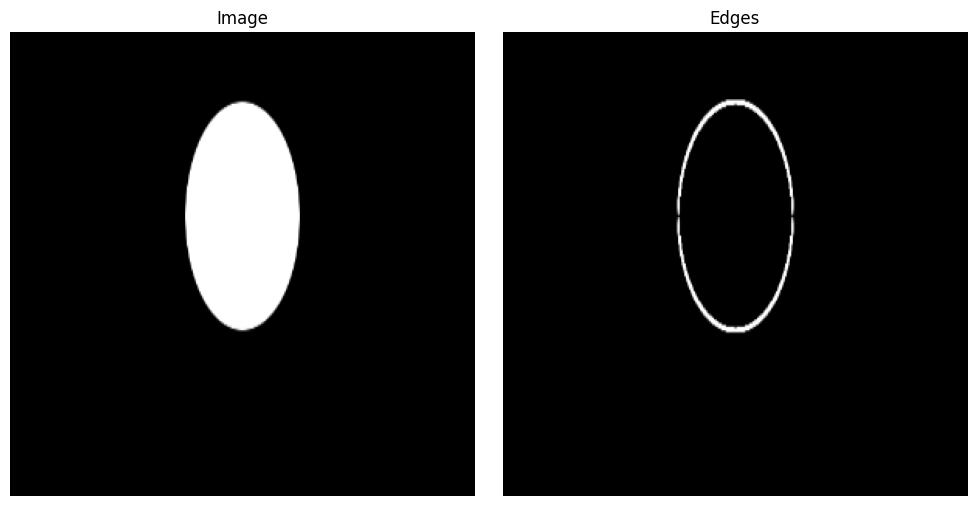

In [15]:
# Load the image
img = r.load_image('2bit2.png')

# Apply Scharr operator to find edges in the x-direction
scharr_x = cv2.Scharr(img, ddepth=cv2.CV_32F, dx=0, dy=1)

# Apply Scharr operator to find edges in the y-direction
scharr_y = cv2.Scharr(img, ddepth=cv2.CV_32F, dx=0, dy=1)

# Combine the x and y derivatives to get the overall gradient
gradient = cv2.magnitude(scharr_x, scharr_y)

# Clip the gradient to the range [0, 255]
gradient = np.clip(gradient, 0, 255)

# Convert the gradient to uint8 for display
gradient = gradient.astype(np.uint8)

# Show the results
r.show_multiple_images(images=(img, gradient), titles=('Image', 'Edges'), cols=2)

<div style="font-family: 'Arial', sans-serif; font-size: 20px; text-align: left; color: #ffffff; background-color: #2d2d2d; padding: 25px; border: 5px solid #ffcc00; border-radius: 15px; box-shadow: 0 6px 20px rgba(0, 0, 0, 0.6); margin-bottom: 25px;">
    <strong style="color: #ffcc00;">Summary of Parameters for <code>cv2.Scharr()</code></strong>
    <table style="color: #cccccc; width: 100%; border-collapse: collapse; margin-top: 20px;">
        <thead>
            <tr style="background-color: #3a3a3a; text-align: left;">
                <th style="padding: 10px; border: 1px solid #ffcc00;">Parameter</th>
                <th style="padding: 10px; border: 1px solid #ffcc00;">Description</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="padding: 10px; border: 1px solid #ffcc00;"><strong>src</strong></td>
                <td style="padding: 10px; border: 1px solid #ffcc00;">The input image (grayscale, single-channel).</td>
            </tr>
            <tr>
                <td style="padding: 10px; border: 1px solid #ffcc00;"><strong>ddepth</strong></td>
                <td style="padding: 10px; border: 1px solid #ffcc00;">The depth of the output image. Set to <code>-1</code> for the same depth as the input image.</td>
            </tr>
            <tr>
                <td style="padding: 10px; border: 1px solid #ffcc00;"><strong>dx</strong></td>
                <td style="padding: 10px; border: 1px solid #ffcc00;">The order of the derivative in the x-direction. Set to <code>1</code> for detecting edges in the x-direction.</td>
            </tr>
            <tr>
                <td style="padding: 10px; border: 1px solid #ffcc00;"><strong>dy</strong></td>
                <td style="padding: 10px; border: 1px solid #ffcc00;">The order of the derivative in the y-direction. Set to <code>1</code> for detecting edges in the y-direction.</td>
            </tr>
            <tr>
                <td style="padding: 10px; border: 1px solid #ffcc00;"><strong>scale</strong></td>
                <td style="padding: 10px; border: 1px solid #ffcc00;">A scaling factor applied to the result (default is <code>1</code>).</td>
            </tr>
            <tr>
                <td style="padding: 10px; border: 1px solid #ffcc00;"><strong>delta</strong></td>
                <td style="padding: 10px; border: 1px solid #ffcc00;">A value added to the result (default is <code>0</code>).</td>
            </tr>
            <tr>
                <td style="padding: 10px; border: 1px solid #ffcc00;"><strong>borderType</strong></td>
                <td style="padding: 10px; border: 1px solid #ffcc00;">Specifies how the borders of the image are handled (default is <code>cv2.BORDER_DEFAULT</code>).</td>
            </tr>
        </tbody>
    </table>
</div>


## 06 `cv2.Laplacian()` - Laplacian Edge Detection

<div style="font-family: 'Arial', sans-serif; font-size: 20px; text-align: left; color: #ffffff; background-color: #2d2d2d; padding: 25px; border: 5px solid #ffcc00; border-radius: 15px; box-shadow: 0 6px 20px rgba(0, 0, 0, 0.6); margin-bottom: 25px;">
    <strong style="color: #ffcc00;">The <code>cv2.Laplacian()</code> Function for Edge Detection</strong>
    <p style="color: #cccccc;">The <code>cv2.Laplacian()</code> function in OpenCV is used to detect edges in an image by computing the Laplacian of the image. The Laplacian operator calculates the second-order derivative of the image, highlighting regions where the intensity changes sharply, which typically correspond to edges.</p> 
    <strong style="color: #ffcc00;">Explanation of Parameters</strong>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li><strong>src</strong> (<em>numpy.ndarray</em>): The input image in which edges are to be detected. It should be a grayscale image, where pixel intensity values represent different features of the image.</li>
        <li><strong>ddepth</strong> (<em>int</em>): The depth of the output image. This parameter determines the type of the output image (e.g., <code>cv2.CV_8U</code>, <code>cv2.CV_32F</code>). A common value is <code>cv2.CV_64F</code>, but <code>-1</code> can be used to keep the same depth as the input.</li>
        <li><strong>ksize</strong> (<em>int</em>): The size of the kernel used for the Laplacian calculation. This controls the size of the kernel for the second derivative. Typically set to <code>3</code> or <code>5</code>.</li>
        <li><strong>scale</strong> (<em>float</em>, optional): A scaling factor applied to the Laplacian values. Default is <code>1</code>.</li>
        <li><strong>delta</strong> (<em>float</em>, optional): A value added to the result of the convolution. Default is <code>0</code>.</li>
    </ul>
    <strong style="color: #ffcc00;">Output</strong>
    <p style="color: #cccccc;">
        <strong>Returns</strong>: The function returns an image representing the Laplacian of the input image. This output highlights areas of rapid intensity change, typically corresponding to edges.
    </p>
    <strong style="color: #ffcc00;">Summary</strong>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li><strong>ddepth</strong>: Specifies the depth of the output image (e.g., <code>cv2.CV_8U</code>, <code>cv2.CV_32F</code>).</li>
        <li><strong>ksize</strong>: Defines the size of the kernel used to compute the second-order derivative.</li>
        <li><strong>scale</strong>: A factor applied to the Laplacian values, typically left as <code>1</code>.</li>
        <li><strong>delta</strong>: An optional value added to the result, often set to <code>0</code>.</li>
    </ul>
    <strong style="color: #ffcc00;">When to Use <code>cv2.Laplacian()</code></strong>
    <p style="color: #cccccc;">
        <code>cv2.Laplacian()</code> is useful when:
    </p>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li>You want to detect edges or rapid intensity changes in an image.</li>
        <li>You need to highlight transitions between light and dark regions in the image, such as for edge detection, image segmentation, or feature extraction.</li>
        <li>The image has noise or weak edges that require more refined detection techniques.</li>
    </ul>
    <p style="color: #cccccc;">
        The Laplacian operator is particularly effective when the edges in the image are not aligned with the horizontal or vertical axes and can be detected in all directions (diagonal, vertical, or horizontal).
    </p>
</div>


In [16]:
img = r.load_image('Picture1.jpg')
new = cv2.Laplacian(src=img, ddepth=-1, ksize=5, scale=3, delta=0.4, borderType=cv2.BORDER_DEFAULT)

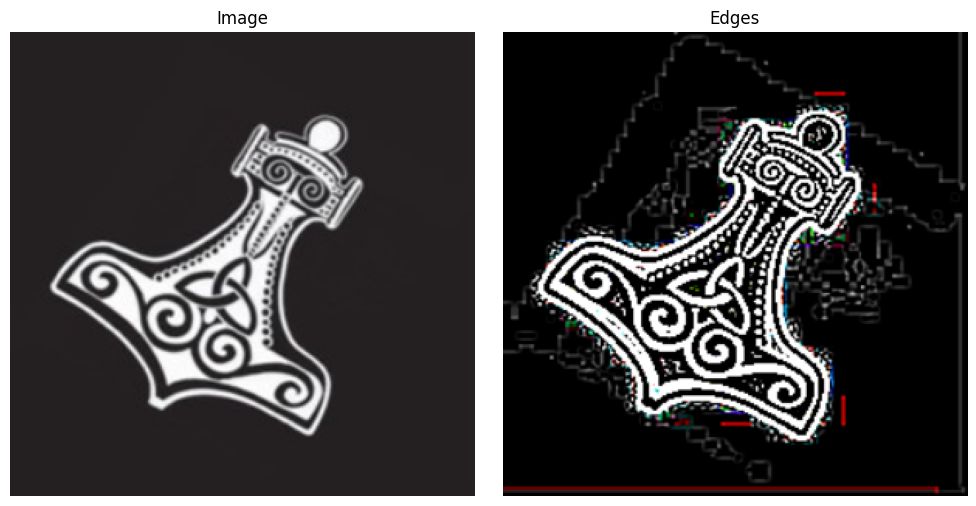

In [17]:
r.show_multiple_images(images=(img, new), titles=('Image', 'Edges'), cols=2)

In [18]:
img = r.load_image('2bit2.png')
new = cv2.Laplacian(src=img, ddepth=-1, ksize=5, scale=3, delta=0.4, borderType=cv2.BORDER_DEFAULT)

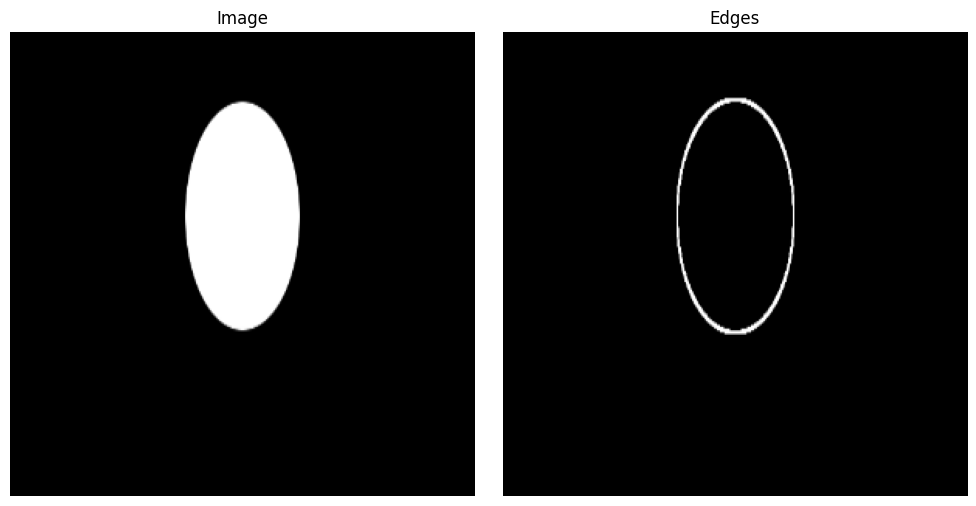

In [19]:
r.show_multiple_images(images=(img, new), titles=('Image', 'Edges'), cols=2)

<div style="font-family: 'Arial', sans-serif; font-size: 20px; text-align: left; color: #ffffff; background-color: #2d2d2d; padding: 25px; border: 5px solid #ffcc00; border-radius: 15px; box-shadow: 0 6px 20px rgba(0, 0, 0, 0.6); margin-bottom: 25px;">
    <strong style="color: #ffcc00;">Summary of Parameters for <code>cv2.Laplacian()</code></strong>
    <table style="color: #cccccc; width: 100%; border-collapse: collapse; margin-top: 10px;">
        <thead>
            <tr>
                <th style="padding: 8px; border: 1px solid #444444; text-align: left;">Parameter</th>
                <th style="padding: 8px; border: 1px solid #444444; text-align: left;">Description</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">src</td>
                <td style="padding: 8px; border: 1px solid #444444;">The input image (grayscale, single-channel).</td>
            </tr>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">ddepth</td>
                <td style="padding: 8px; border: 1px solid #444444;">The depth of the output image. Set to <code>-1</code> for the same depth as the input image or specify a depth such as <code>CV_8U</code>, <code>CV_16S</code>, <code>CV_32F</code>, or <code>CV_64F</code>.</td>
            </tr>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">ksize</td>
                <td style="padding: 8px; border: 1px solid #444444;">The size of the Sobel kernel used for computing the Laplacian. Typical values are <code>1</code>, <code>3</code>, <code>5</code>, or <code>7</code>. Larger values will smooth the image more but may reduce edge detail.</td>
            </tr>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">scale</td>
                <td style="padding: 8px; border: 1px solid #444444;">A scaling factor applied to the result (default is <code>1</code>). It is used to scale the Laplacian result.</td>
            </tr>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">delta</td>
                <td style="padding: 8px; border: 1px solid #444444;">A value added to the result (default is <code>0</code>). It allows you to add an offset to the Laplacian values.</td>
            </tr>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">borderType</td>
                <td style="padding: 8px; border: 1px solid #444444;">Specifies how the borders of the image are handled (default is <code>cv2.BORDER_DEFAULT</code>). Common options include <code>cv2.BORDER_REPLICATE</code>, <code>cv2.BORDER_REFLECT</code>, etc.</td>
            </tr>
        </tbody>
    </table>
</div>


## 07. `cv2.filter2D()` - Apply an Arbitrary Filter to an Image

<div style="font-family: 'Arial', sans-serif; font-size: 20px; text-align: left; color: #ffffff; background-color: #2d2d2d; padding: 25px; border: 5px solid #ffcc00; border-radius: 15px; box-shadow: 0 6px 20px rgba(0, 0, 0, 0.6); margin-bottom: 25px;">
    <strong style="color: #ffcc00;">The <code>cv2.filter2D()</code> Function for Image Filtering</strong>
    <p style="color: #cccccc;">The <code>cv2.filter2D()</code> function in OpenCV is used to apply a custom kernel (convolution matrix) to an image. It allows for the convolution of an image with a user-defined kernel, enabling various types of image processing operations, such as blurring, sharpening, edge detection, and more.</p>
    <strong style="color: #ffcc00;">Explanation of Parameters</strong>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li><strong>src</strong> (<em>numpy.ndarray</em>): The input image on which the filter is to be applied. It can be a grayscale or color image, depending on the operation you intend to perform.</li>
        <li><strong>ddepth</strong> (<em>int</em>): The depth of the output image. This parameter defines the data type of the resulting image. Common values are:
            <ul style="color: #cccccc; padding-left: 20px;">
                <li>-1 to use the same depth as the input image.</li>
                <li><code>cv2.CV_8U</code> for an 8-bit unsigned integer depth.</li>
                <li><code>cv2.CV_32F</code> for a 32-bit floating point depth, among others.</li>
            </ul>
        </li>
        <li><strong>kernel</strong> (<em>numpy.ndarray</em>): The convolution kernel or filter. This is a user-defined matrix (2D array) that is used to perform the convolution operation. The kernel determines the type of filtering effect applied to the image, such as sharpening or blurring.</li>
        <li><strong>anchor</strong> (<em>tuple</em>, optional): The anchor point within the kernel. This defines the position of the kernel’s center during the convolution. By default, it is set to <code>(-1, -1)</code>, meaning the center of the kernel is used as the anchor point.</li>
        <li><strong>borderType</strong> (<em>int</em>, optional): Specifies how the borders of the image are handled during convolution. Common values include:
            <ul style="color: #cccccc; padding-left: 20px;">
                <li><code>cv2.BORDER_CONSTANT</code>: Extend the border with a constant value (default is 0).</li>
                <li><code>cv2.BORDER_REFLECT</code>: Reflect the image pixels at the border.</li>
                <li><code>cv2.BORDER_REPLICATE</code>: Repeat the border pixel values.</li>
            </ul>
        </li>
    </ul>
    <strong style="color: #ffcc00;">Output</strong>
    <p style="color: #cccccc;">
        <strong>Returns</strong>: The function returns the filtered image, where the filter (kernel) has been applied. The output image may have enhanced or suppressed features depending on the kernel used.
    </p>
    <strong style="color: #ffcc00;">Summary</strong>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li><strong>ddepth</strong>: Specifies the depth (data type) of the output image.</li>
        <li><strong>kernel</strong>: The filter (convolution matrix) applied to the input image. This matrix controls the effect of the filter (e.g., blurring, sharpening).</li>
        <li><strong>anchor</strong>: Determines the kernel’s reference point for convolution (typically the center).</li>
        <li><strong>borderType</strong>: Defines how borders are treated during convolution (e.g., constant, reflect, replicate).</li>
    </ul>
    <strong style="color: #ffcc00;">When to Use <code>cv2.filter2D()</code></strong>
    <p style="color: #cccccc;">
        <code>cv2.filter2D()</code> is useful when:
    </p>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li>You want to apply a custom filter to an image, such as blurring, sharpening, edge detection, or custom image transformations.</li>
        <li>You need precise control over the filter kernel and its effect on the image.</li>
        <li>You want to apply more advanced filters that are not built into other OpenCV functions, such as non-linear filters or specific mathematical operations.</li>
    </ul>
    <p style="color: #cccccc;">
        This function is highly versatile and can be used in a wide range of image processing applications, including:
    </p>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li><strong>Image smoothing</strong> (using a blurring kernel),</li>
        <li><strong>Edge detection</strong> (using kernels like Sobel or Laplacian),</li>
        <li><strong>Sharpening</strong> (using a sharpening kernel),</li>
        <li><strong>Custom operations</strong> by designing your own kernel.</li>
    </ul>
</div>


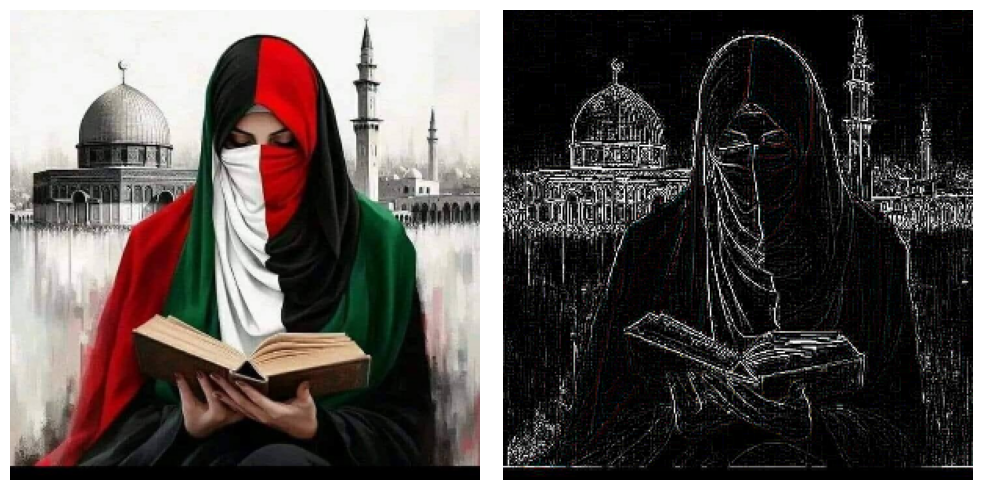

In [20]:
kernal = np.array([[ 0,  0,  1,  0,  0],
                   [ 0,  1,  2,  1,  0],
                   [ 1,  2, -16,  2,  1],
                   [ 0,  1,  2,  1,  0],
                   [ 0,  0,  1,  0,  0]])
img = r.load_image('1.jpg')
img1 = cv2.filter2D(img,ddepth=-1, kernel=kernal)
r.show_multiple_images((img,img1), cols=2)

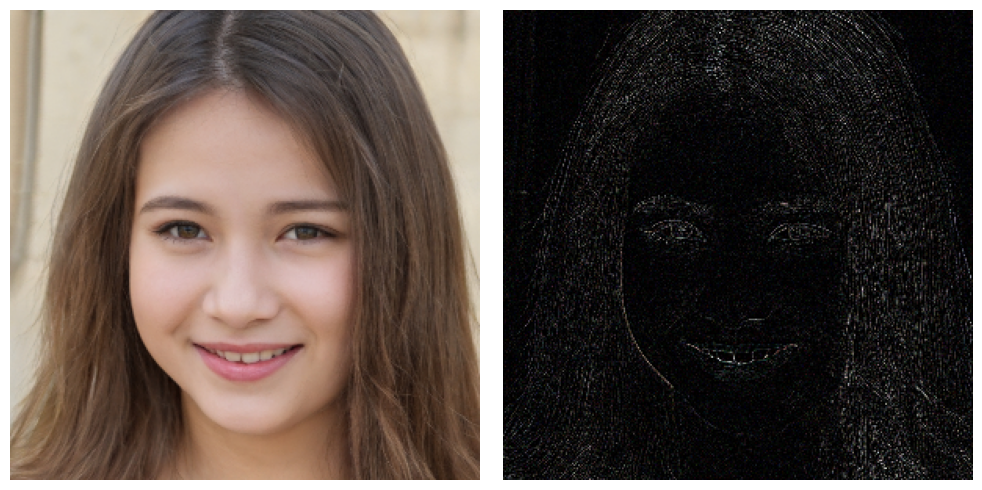

In [21]:
img = r.load_image('img5.jpg')
img1 = cv2.filter2D(img,ddepth=-1, kernel=kernal)
r.show_multiple_images((img,img1), cols=2)

<div style="font-family: 'Arial', sans-serif; font-size: 20px; text-align: left; color: #ffffff; background-color: #2d2d2d; padding: 25px; border: 5px solid #ffcc00; border-radius: 15px; box-shadow: 0 6px 20px rgba(0, 0, 0, 0.6); margin-bottom: 25px;">
    <strong style="color: #ffcc00;">Summary of Parameters for <code>cv2.filter2D()</code></strong>
    <table style="color: #cccccc; width: 100%; border-collapse: collapse; margin-top: 10px;">
        <thead>
            <tr>
                <th style="padding: 8px; border: 1px solid #444444; text-align: left;">Parameter</th>
                <th style="padding: 8px; border: 1px solid #444444; text-align: left;">Description</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">src</td>
                <td style="padding: 8px; border: 1px solid #444444;">The input image, which can be grayscale or color.</td>
            </tr>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">ddepth</td>
                <td style="padding: 8px; border: 1px solid #444444;">The desired depth of the output image. Use <code>-1</code> to keep the same depth as the input image.</td>
            </tr>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">kernel</td>
                <td style="padding: 8px; border: 1px solid #444444;">The kernel (filter) used for convolution. It must be a 2D array (e.g., a sharpening or smoothing filter).</td>
            </tr>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">anchor</td>
                <td style="padding: 8px; border: 1px solid #444444;">The anchor point within the kernel. Use <code>(-1, -1)</code> to place it at the kernel's center (default).</td>
            </tr>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">delta</td>
                <td style="padding: 8px; border: 1px solid #444444;">An optional value added to the result after convolution. Default is <code>0</code>.</td>
            </tr>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">borderType</td>
                <td style="padding: 8px; border: 1px solid #444444;">Specifies how to handle image borders. Common options include <code>cv2.BORDER_DEFAULT</code>, <code>cv2.BORDER_REFLECT</code>, and <code>cv2.BORDER_CONSTANT</code>.</td>
            </tr>
        </tbody>
    </table>
</div>


## cv2.HoughCircle()

<div style="font-family: 'Arial', sans-serif; font-size: 20px; text-align: left; color: #ffffff; background-color: #2d2d2d; padding: 25px; border: 5px solid #ffcc00; border-radius: 15px; box-shadow: 0 6px 20px rgba(0, 0, 0, 0.6); margin-bottom: 25px;">
    <strong style="color: #ffcc00;">The <code>cv2.HoughCircles()</code> Function for Circle Detection</strong>
    <p style="color: #cccccc;">
        The <code>cv2.HoughCircles()</code> function in OpenCV detects circles in a grayscale image using the Hough Circle Transform. It is particularly effective for detecting circular shapes with well-defined edges.
    </p>
    <strong style="color: #ffcc00;">Parameters</strong>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li><strong>image</strong> (<code>numpy.ndarray</code>): The input grayscale image in which circles are to be detected. If the image is in color, it must first be converted to grayscale using <code>cv2.cvtColor()</code>.</li>
        <li><strong>method</strong> (<code>int</code>): The method used for circle detection. The only available option is <code>cv2.HOUGH_GRADIENT</code>.</li>
        <li><strong>dp</strong> (<code>float</code>): The inverse ratio of the accumulator resolution to the image resolution. A value of <code>1</code> means the accumulator has the same resolution as the input image; <code>2</code> means half the resolution.</li>
        <li><strong>minDist</strong> (<code>float</code>): The minimum distance between the centers of detected circles. This parameter prevents multiple nearby detections of the same circle.</li>
        <li><strong>param1</strong> (<code>float</code>, optional): The higher threshold for the Canny edge detector. Used to detect edges that are candidates for circles.</li>
        <li><strong>param2</strong> (<code>float</code>, optional): The accumulator threshold for circle detection. Smaller values result in detecting more circles, but they may include false positives.</li>
        <li><strong>minRadius</strong> (<code>int</code>, optional): The minimum radius of circles to detect. Default is <code>0</code>.</li>
        <li><strong>maxRadius</strong> (<code>int</code>, optional): The maximum radius of circles to detect. Default is <code>0</code> (no limit).</li>
    </ul>
    <strong style="color: #ffcc00;">Output</strong>
    <p style="color: #cccccc;">
        <strong>Returns</strong>: A list of detected circles, where each circle is represented as a three-element vector <code>(x_center, y_center, radius)</code>. If no circles are detected, the function returns <code>None</code>.
    </p>
    <strong style="color: #ffcc00;">Summary of Parameters</strong>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li><strong>method</strong>: Always <code>cv2.HOUGH_GRADIENT</code>.</li>
        <li><strong>dp</strong>: Controls the resolution of the accumulator. Higher values decrease computation but may miss small circles.</li>
        <li><strong>minDist</strong>: Avoids detecting overlapping circles by specifying the minimum center-to-center distance.</li>
        <li><strong>param1</strong>: Sets the Canny edge detection threshold.</li>
        <li><strong>param2</strong>: Sets the threshold for detecting valid circles in the accumulator.</li>
        <li><strong>minRadius</strong> and <strong>maxRadius</strong>: Define the range of circle sizes to detect.</li>
    </ul>
    <strong style="color: #ffcc00;">When to Use <code>cv2.HoughCircles()</code></strong>
    <p style="color: #cccccc;">
        Use <code>cv2.HoughCircles()</code> when:
    </p>
    <ul style="color: #cccccc; padding-left: 20px;">
        <li>You need to detect circular shapes in images, such as coins, balls, or circular patterns.</li>
        <li>The image has well-defined edges and relatively uniform lighting conditions.</li>
        <li>Accurate circle detection is required, and you can adjust parameters like <code>dp</code>, <code>param1</code>, and <code>param2</code> to fine-tune the results.</li>
    </ul>
    <p style="color: #cccccc;">
        Ensure pre-processing, such as noise reduction and edge enhancement, is applied to improve detection accuracy.
    </p>
</div>


In [22]:
# Load the image
img = r.load_image('circles.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply median blur to the grayscale image
blur = cv2.medianBlur(gray, ksize=11)

# Detect circles using HoughCircles
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0)

data = np.uint16(np.round(circles))

for (x,y,ra) in data[0,:]:
    cv2.circle(img, (x,y), ra, (0,244,120), 4)

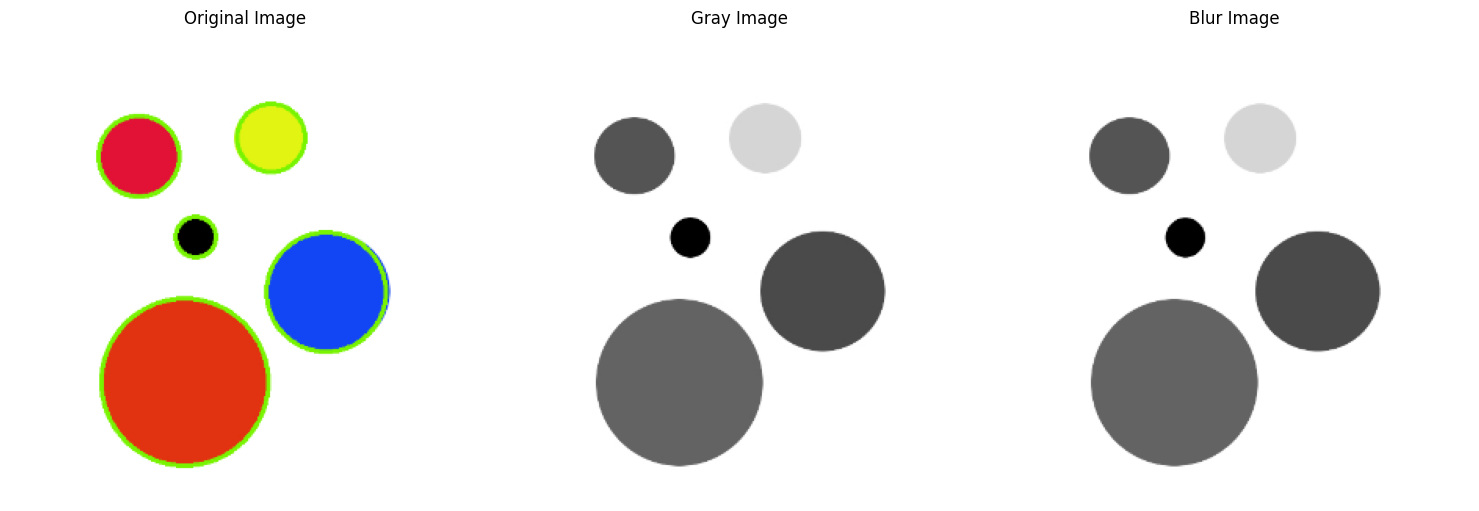

In [23]:
r.show_multiple_images((img, gray, blur), titles=("Original Image", "Gray Image", "Blur Image"))


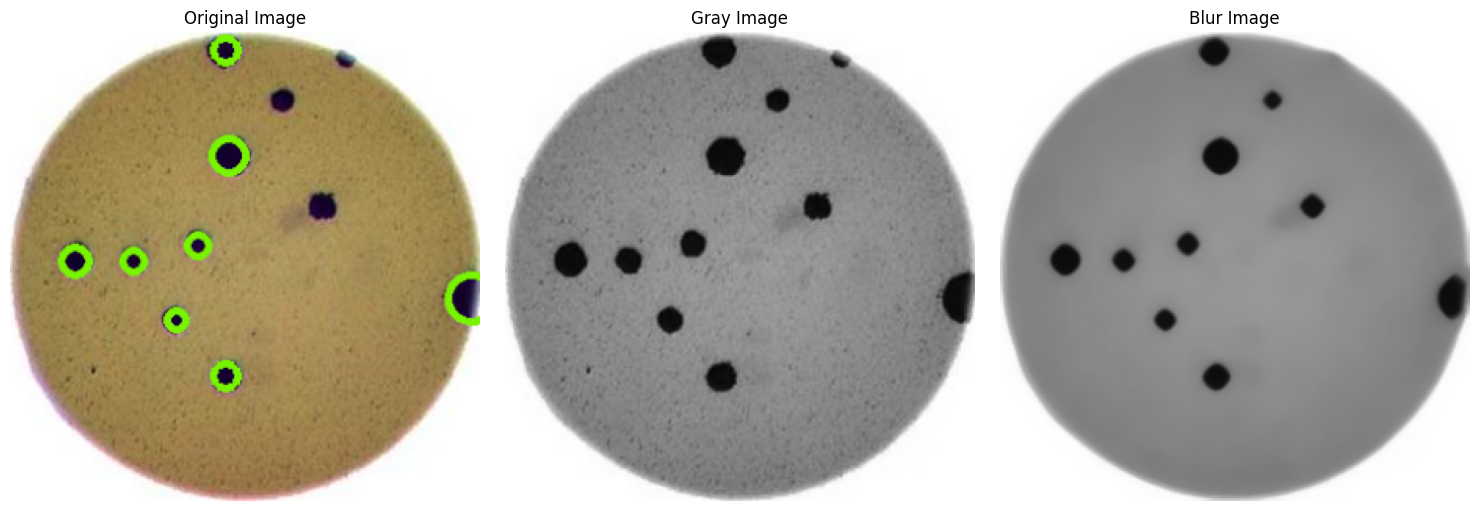

In [24]:
# Load the image
img = r.load_image('colonies-01.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply median blur to the grayscale image
blur = cv2.medianBlur(gray, ksize=15)

# Detect circles using HoughCircles
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=50, param2=20, minRadius=0, maxRadius=40)

data = np.uint16(np.round(circles))

for (x,y,ra) in data[0,:]:
    cv2.circle(img, (x,y), ra, (0,244,120), 4)

r.show_multiple_images((img, gray, blur), titles=("Original Image", "Gray Image", "Blur Image"))

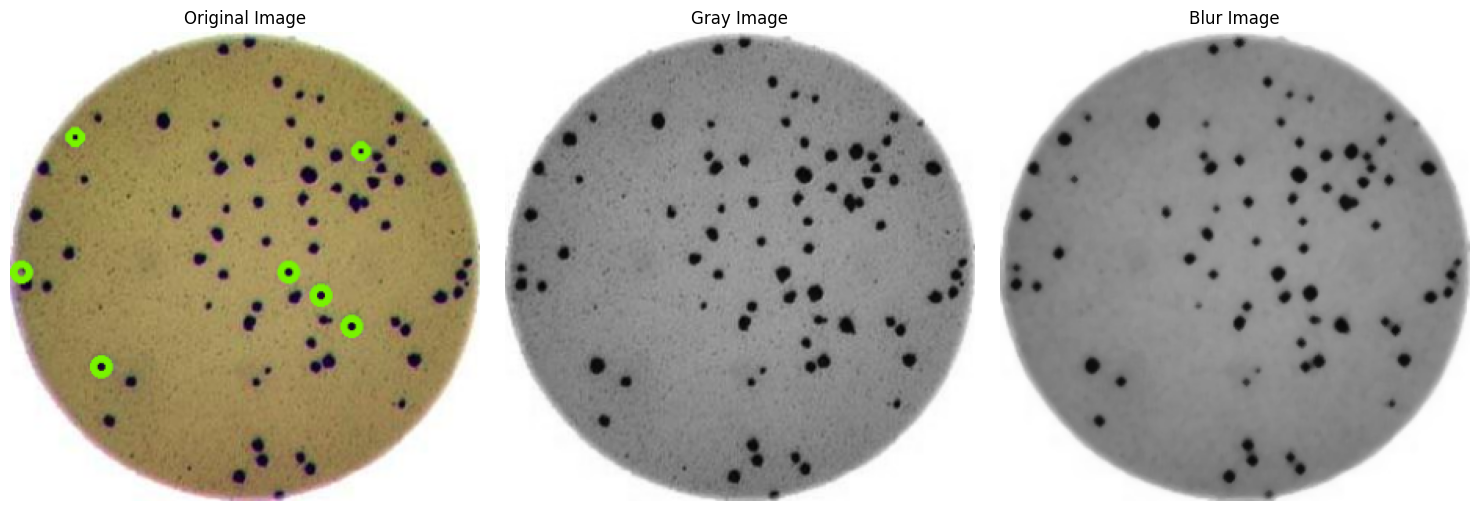

In [25]:
# Load the image
img = r.load_image('colonies-02.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply median blur to the grayscale image
blur = cv2.medianBlur(gray, ksize=5)

# Detect circles using HoughCircles
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, dp=2.9, minDist=10, param1=70, param2=30, minRadius=0, maxRadius=10)

data = np.uint16(np.round(circles))

for (x,y,ra) in data[0,:]:
    cv2.circle(img, (x,y), ra, (0,244,120), 4)

r.show_multiple_images((img, gray, blur), titles=("Original Image", "Gray Image", "Blur Image"))

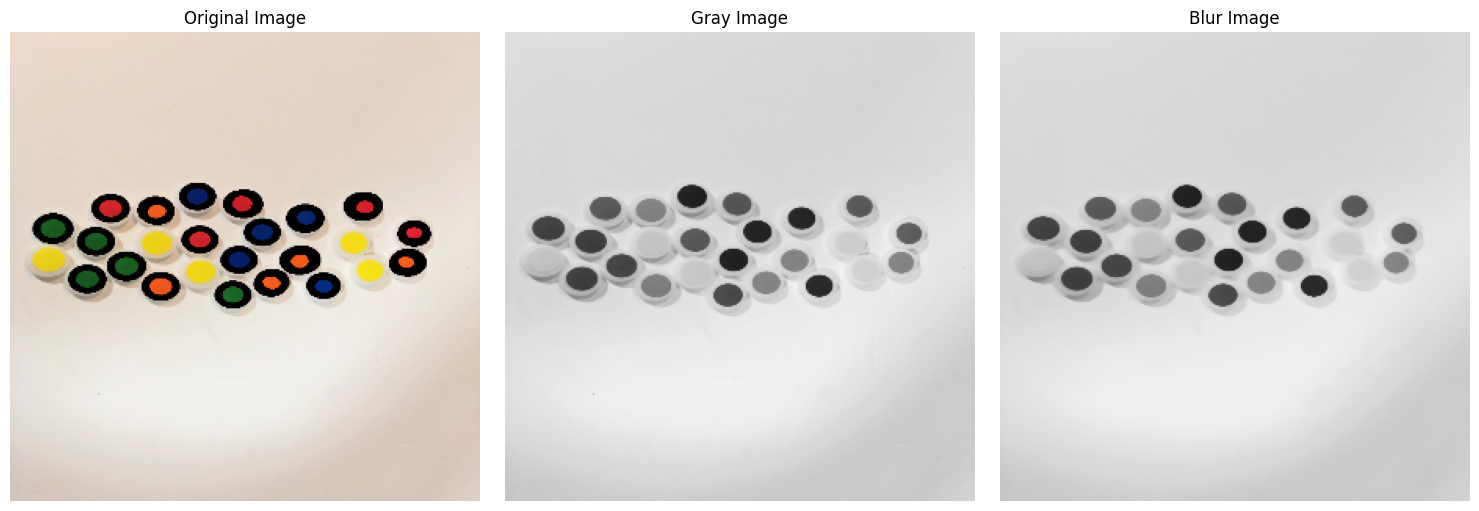

In [26]:
# Load the image
img = r.load_image('IMG_7582-768x1024.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply median blur to the grayscale image
blur = cv2.medianBlur(gray, ksize=11)

# Detect circles using HoughCircles
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, dp=1, minDist=3, param1=70, param2=30, minRadius=15, maxRadius=35)

data = np.uint16(np.round(circles))

for (x,y,ra) in data[0,:]:
    cv2.circle(img, (x,y), ra, (0,0,0), 12)

r.show_multiple_images((img, gray, blur), titles=("Original Image", "Gray Image", "Blur Image"))

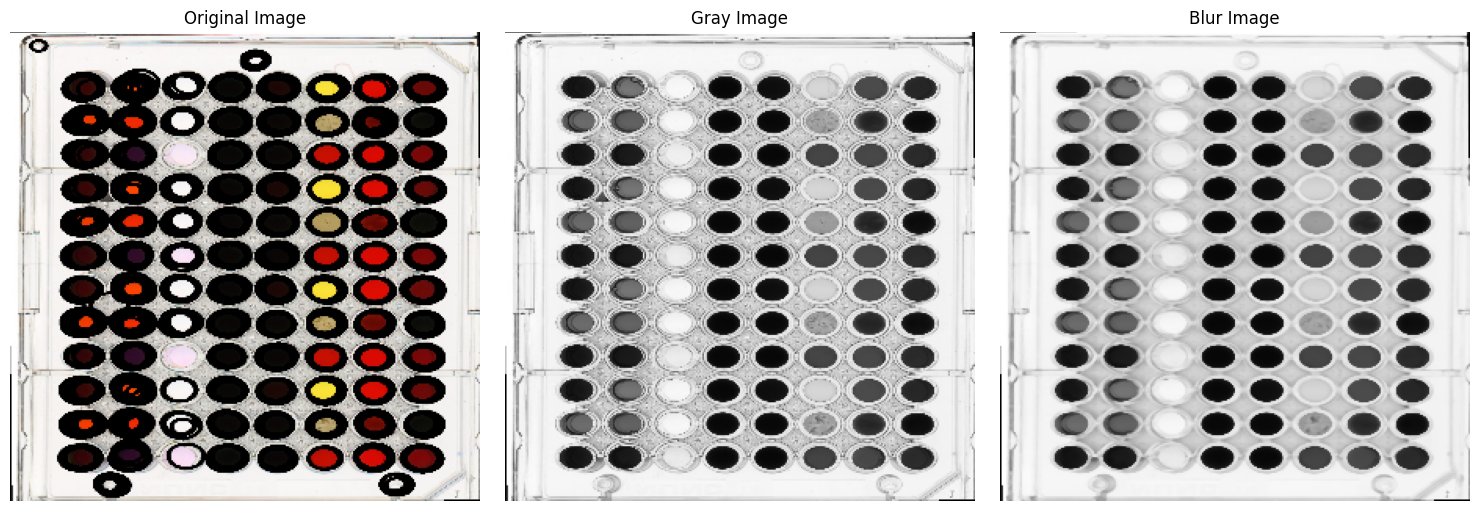

In [27]:
# Load the image
img = r.load_image('wellplate-02.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply median blur to the grayscale image
blur = cv2.medianBlur(gray, ksize=11)

# Detect circles using HoughCircles
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, dp=1, minDist=3, param1=70, param2=30, minRadius=20, maxRadius=55)

data = np.uint16(np.round(circles))

for (x,y,ra) in data[0,:]:
    cv2.circle(img, (x,y), ra, (0,0,0), 12)

r.show_multiple_images((img, gray, blur), titles=("Original Image", "Gray Image", "Blur Image"))

<div style="font-family: 'Arial', sans-serif; font-size: 20px; text-align: left; color: #ffffff; background-color: #2d2d2d; padding: 25px; border: 5px solid #ffcc00; border-radius: 15px; box-shadow: 0 6px 20px rgba(0, 0, 0, 0.6); margin-bottom: 25px;">
    <strong style="color: #ffcc00;">Summary of Parameters for <code>cv2.HoughCircles()</code></strong>
    <table style="color: #cccccc; width: 100%; border-collapse: collapse; margin-top: 10px;">
        <thead>
            <tr>
                <th style="padding: 8px; border: 1px solid #444444; text-align: left;">Parameter</th>
                <th style="padding: 8px; border: 1px solid #444444; text-align: left;">Description</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">image</td>
                <td style="padding: 8px; border: 1px solid #444444;">The input grayscale image in which circles are to be detected.</td>
            </tr>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">method</td>
                <td style="padding: 8px; border: 1px solid #444444;">The detection method. Use <code>cv2.HOUGH_GRADIENT</code>, which is the only method currently supported.</td>
            </tr>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">dp</td>
                <td style="padding: 8px; border: 1px solid #444444;">The inverse ratio of the accumulator resolution to the image resolution. Higher values reduce computational cost but may miss small circles.</td>
            </tr>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">minDist</td>
                <td style="padding: 8px; border: 1px solid #444444;">The minimum distance between the centers of detected circles to avoid multiple detections of the same circle.</td>
            </tr>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">param1</td>
                <td style="padding: 8px; border: 1px solid #444444;">The higher threshold for the Canny edge detector. Edges above this threshold are candidates for circles.</td>
            </tr>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">param2</td>
                <td style="padding: 8px; border: 1px solid #444444;">The accumulator threshold for circle detection. Smaller values result in detecting more circles but may include false positives.</td>
            </tr>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">minRadius</td>
                <td style="padding: 8px; border: 1px solid #444444;">The minimum radius of circles to detect. Use <code>0</code> to detect all sizes down to a point.</td>
            </tr>
            <tr>
                <td style="padding: 8px; border: 1px solid #444444;">maxRadius</td>
                <td style="padding: 8px; border: 1px solid #444444;">The maximum radius of circles to detect. Use <code>0</code> to impose no upper limit on the circle size.</td>
            </tr>
        </tbody>
    </table>
</div>
